Import library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # untuk 3D plot
# Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
# Load dataset Wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Tampilkan 5 baris pertama
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


Cek Data Duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

Distribusi kelas target

In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Fitur dan Tabel

In [ ]:
x = wine.data
y = wine.target

print("Shape x:", x.shape)
print("Shape y:", y.shape)

Shape x: (178, 13)
Shape y: (178,)


Train-test split (80% train, 20% test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape x_train:", x_train.shape)
print("Shape x_test :", x_test.shape)

Shape x_train: (142, 13)
Shape x_test : (36, 13)


Standarisasi

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) # fit + transform pada data latih
x_test_scaled = scaler.transform(x_test)       # hanya transform pada data uji

x_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

Penerapan SVM tanpa PCA

In [ ]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(x_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(x_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi SVM tanpa PCA: 0.9722222222222222

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Penerapan PCA

In [ ]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print("Shape X_train_pca:", x_train_pca.shape) # (n_train, 3)
print("Shape X_test_pca :", x_test_pca.shape)  # (n_test, 3)

Shape X_train_pca: (142, 3)
Shape X_test_pca : (36, 3)


Menampilkan Variasi yang Dijelaskan oleh Setiap Komponen

In [ ]:
# Variansi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variansi yang dijelaskan 3 komponen pertama: 0.6608261082211259


Membangun Model SVM dengan PCA

In [ ]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(x_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(x_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Visualisasi PCA dengan Ruang 3 Dimensi

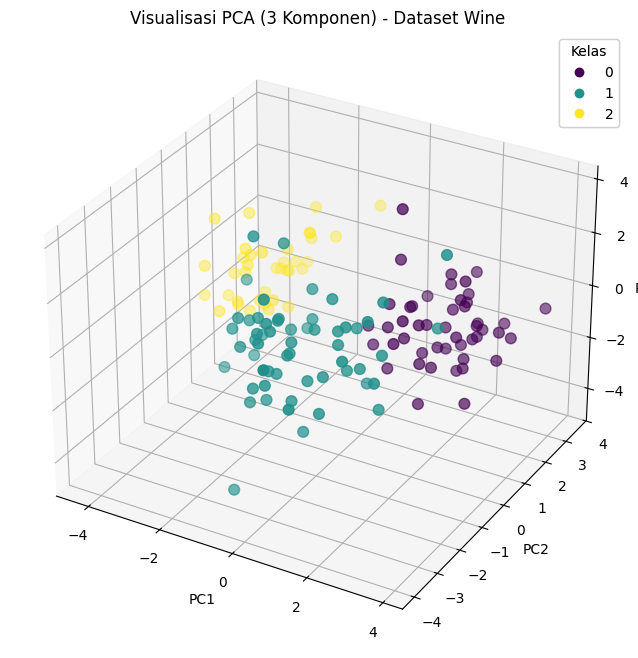

In [ ]:
# Visualisasi 3D PCA (menggunakan data train)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    x_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend berdasarkan kelas
legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend1)

plt.show()

Perbandingan Model SVM tanpa PCA dan Dengan PCA

In [ ]:
# Membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [x_train_scaled.shape[1], x_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': ['None', explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,13,0.972222,None
1,SVM Dengan PCA (3 Komponen),3,0.972222,0.660826


Visualisasi Grafik

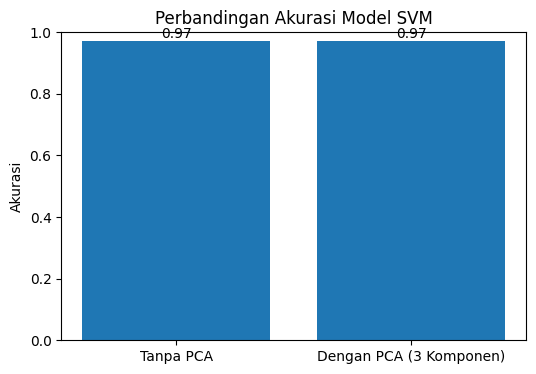

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()